In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Create sample data
num_samples_class = 500
positive_samples = 4 * np.random.randn(num_samples_class) + 4
negative_samples = 3 * np.random.randn(num_samples_class) - 8
x = np.concatenate((negative_samples, positive_samples), axis=0)
y = np.zeros(num_samples_class*2)
y[num_samples_class:] = 1
y_onehot = np.zeros((num_samples_class*2, 2))
y_onehot[:num_samples_class, 0] = 1
y_onehot[num_samples_class:, 1] = 1

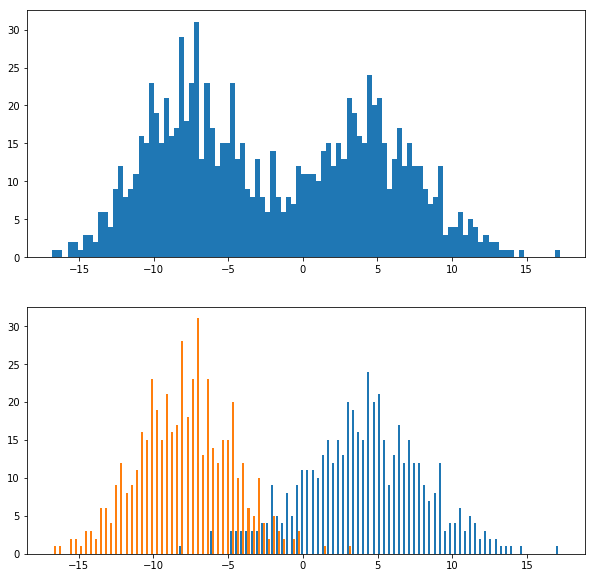

In [3]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
res = plt.hist(x, bins=100)
plt.subplot(2,1,2)
res = plt.hist([positive_samples, negative_samples], bins=100)

In [4]:
x = np.atleast_2d(x).T
print(x.shape)
print(y_onehot.shape)
print(y.shape)

(1000, 1)
(1000, 2)
(1000,)


In [12]:
# Create logistic regression model
w_init = np.random.randn(1)
print('Initial weight value = {}'.format(w_init[0]))
w = tf.Variable(w_init, dtype=tf.float32)
b = tf.Variable(1.0)
weighted_x = w * x + b
y_prob_pos = tf.nn.softmax(weighted_x)
y_prob_neg = 1 - y_prob_pos
y_prob = tf.concat([y_prob_neg, y_prob_pos], 1)

Initial weight value = 0.41928662664260946


In [13]:
# Logistic loss: Cross-entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_onehot*tf.log(y_prob), axis=-1))
# Logistic accuracy
correct_prediction = tf.equal(tf.round(y_prob_pos), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [15]:
# Main loop
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    init_vals = session.run([loss, w, b])
    print('Initial values: loss={}  w={}  b={}'.format(*init_vals))
    
    for step in range(150):
        print('Step {}'.format(step))
        vals = session.run([train, loss, accuracy, w, b, y_prob])
        print('y probability: {}'.format(vals[-1]))
        print('loss={}  accuracy={}  w={}  b={}'.format(*vals[1:]))

Initial values: loss=nan  w=[ 0.41928664]  b=1.0
Step 0
y probability: [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
loss=nan  accuracy=0.5  w=[ nan]  b=nan
Step 1
y probability: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]
loss=nan  accuracy=0.0  w=[ nan]  b=nan
Step 2
y probability: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]
loss=nan  accuracy=0.0  w=[ nan]  b=nan
Step 3
y probability: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]
loss=nan  accuracy=0.0  w=[ nan]  b=nan
Step 4
y probability: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]
loss=nan  accuracy=0.0  w=[ nan]  b=nan
Step 5
y probability: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]
loss=nan  accuracy=0.0  w=[ nan]  b=nan
Step 6
y probability: [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan 